In [1]:
from pgmpy.models import MarkovModel
from pgmpy.factors import Factor
from pgmpy.readwrite import XMLBIFWriter
from pgmpy.inference import BeliefPropagation
import scipy.stats as stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pgmpy.inference import VariableElimination
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/jonathanhilgart/anaconda/envs/SVB/lib/python3.6/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
esp_eligible_products = ['Money Market Bonus','Collateral MMA',
'Cash Management',
'FX Products',
'Letters of Credit',
'Enterprise Sweep',
'Checking USD']

In [6]:
from pgmpy.factors import JointProbabilityDistribution as Joint

In [4]:
 checking_prob = np.poly1d([ -1.25712688e-07,  -2.44667686e-04,   9.74145030e-01])

In [31]:
## define a probability distribution over each pair of varaibles
def ESP_Joint_Product_Probabilities(week_n):
    """Returns the conditions probabilities of money market and every other ESP product.
    Joint probability are from 2013-2016 GP with L10 desc data.
    
    Returns a dictionary of each probabilitiy distribution given the time.
    
    Takes inputs as weeks. need to conver to days interally in the function"""
    days = week_n*7

    
    # find the probabilities given a month number for money market bonus
 
    
    mmb1_cmma1 = np.poly1d([  1.57710236e-11 , -4.50918313e-08,   5.17171411e-05,   4.19854824e-03] )
    mmb1_cmma0 = np.poly1d([  5.25022109e-08 , -3.66526133e-05 ,  4.31836634e-02])
    mmb0_cmma1 = np.poly1d([  2.39132559e-10 , -5.22063431e-07 ,  3.28246525e-04 ,  1.09429264e-01])
    mmb0_cmma0 = np.poly1d([ -1.34227959e-10 ,  4.08578338e-07 , -3.34042008e-04 ,  1.10449016e-01])
    
    mmb1_cm1 = np.poly1d([ -2.72325078e-08  , 5.32423195e-05 ,  2.38412505e-03])
    mmb1_cm0 = np.poly1d([  6.60564241e-08 , -5.44885860e-05 ,  4.67588381e-02])
    mmb0_cm1 = np.poly1d([  3.16255512e-10 , -7.74450019e-07 ,  5.56003734e-04  , 4.71241933e-02]  )
    mmb0_cm0 = np.poly1d([  1.41849046e-07 , -1.75714227e-04 ,  7.94067952e-02] )
    
    mmb1_fx1 = np.poly1d( [  3.93071703e-08,  -4.24533508e-05 ,  1.02708813e-02] )
    mmb1_fx0 = np.poly1d([ -6.18015494e-09,   4.68190039e-05 ,  3.79494063e-02])
    mmb0_fx1 = np.poly1d([  9.79641242e-11 , -1.97399479e-07 ,  1.24149742e-04  , 3.76001760e-02])
    mmb0_fx0 = np.poly1d([ -1.61318891e-08  , 4.00025566e-05  , 5.82964383e-02])
    
    mmb1_loc1 = np.poly1d([ -4.22550570e-09  , 5.65017578e-06 , -3.96488802e-04])
    mmb1_loc0 = np.poly1d([  1.21432277e-07 , -7.56422505e-05  , 5.94759824e-02])
    mmb0_loc1 = np.poly1d([  1.38119839e-10 , -2.43899273e-07  , 1.23190415e-04 , -5.11590717e-03])
    mmb0_loc0 = np.poly1d([  4.90160780e-09 , -1.10602879e-05,   8.06727522e-03] )
    
    mmb1_es1 = np.poly1d([ -3.44219706e-10 ,  3.77089961e-07 ,  5.65117553e-05] )
    mmb1_es0 = np.poly1d([  1.31831110e-07,  -8.26822418e-05 ,  6.08844357e-02])
    mmb0_es1 = np.poly1d([  9.36293242e-11  ,-1.83673854e-07 ,  9.34740975e-05 , -7.24107407e-04])
    mmb0_es0 = np.poly1d(  [  5.35776109e-09,  -1.62917100e-05  , 1.13478188e-02] )

    mmb1_checking1 = np.poly1d([  8.99847816e-11 , -2.12253976e-07 ,  1.73945104e-04,   2.43084138e-02]  )
    mmb1_checking0 = np.poly1d([  5.58809362e-10,  -1.19722344e-06 ,  6.02004728e-04] )
    mmb0_checking1 = np.poly1d([  4.76383257e-10 , -1.22998136e-06 ,  4.85653876e-04 ,  8.38437547e-01] )
    mmb0_checking0 = np.poly1d([ -1.42872744e-10 ,  4.74608836e-07 , -2.78432877e-04,   4.27906033e-02])
    
    ## Collatral CMMA
    cmma1_cm1 = np.poly1d([  3.75813976e-10 , -8.56156960e-07,   5.90366126e-04 ,  4.05775990e-02]  )
    cmma1_cm0 = np.poly1d([  6.13492897e-08 , -9.60537438e-05 ,  6.11042095e-02]  )
    cmma0_cm1 = np.poly1d([ -1.91945343e-06 ,  2.01259639e-02] )
    cmma0_cm0 = np.poly1d([ -5.30441353e-10  , 1.64201864e-06 , -1.36724991e-03 ,  5.64692343e-01])
    
    cmma1_fx1 = np.poly1d([ -1.06499066e-08 ,  3.17261485e-05 ,  5.02692557e-03])
    cmma1_fx0 = np.poly1d([  1.98711324e-10,  -4.70445387e-07 ,  3.16964167e-04  , 1.10315607e-01])
    cmma0_fx1 = np.poly1d([  1.96260309e-10 , -3.77250869e-07 ,  1.92240042e-04  , 2.46124176e-02] )
    cmma0_fx0 = np.poly1d([  5.40086652e-08 , -1.00737395e-04 ,  1.81095840e-01])

    
    cmma1_loc1 = np.poly1d([  3.70118002e-08 , -3.21635779e-05,   1.31499011e-02] )
    cmma1_loc0 = np.poly1d([  2.08776657e-10 , -4.56851028e-07  , 3.06623482e-04  , 1.14971490e-01]  )
    cmma0_loc1 = np.poly1d([ -3.20735229e-09 ,  4.27585774e-06,  -3.26305490e-04] )
    cmma0_loc0 = np.poly1d([ -6.19025251e-09 , -2.20873660e-05  , 4.47722538e-02] )
    
    cmma1_es1 = np.poly1d([ -1.48874965e-06  , 4.09690027e-03] )
    cmma1_es0 = np.poly1d([  3.20684365e-10 , -6.51792778e-07 ,  4.03725687e-04 ,  1.09675529e-01] )
    cmma0_es1 = np.poly1d([  1.70001207e-08 , -2.27327923e-05 ,  1.01116227e-02])
    cmma0_es0 = np.poly1d([  4.54790548e-06 ,  7.22027214e-03])
    
    cmma1_checking1 = np.poly1d([  5.38817243e-11 , -2.13296293e-07 ,  2.17272948e-04 ,  1.28643234e-01])
    cmma1_checking0 = np.poly1d([ -1.84114473e-08  , 3.30581359e-05]  )
    cmma0_checking1 = np.poly1d([ -7.70005472e-08 , -2.48167069e-04 ,  8.20246692e-01] )
    cmma0_checking0 = np.poly1d([ -5.35019543e-10 ,  1.49208839e-06 , -8.83207458e-04 ,  1.46021278e-01]  )
    # Cash Management 
    cm1_fx1 = np.poly1d([ -2.70627054e-08 ,  5.19710745e-05 , -4.78058702e-04]  )
    cm1_fx0 = np.poly1d([  2.89145542e-10 , -7.46952150e-07  , 5.56072910e-04 ,  4.85444905e-02])
    cm0_fx1 = np.poly1d([  7.12815404e-08 , -8.22838713e-05  , 6.13188854e-02] )
    cm0_fx0 = np.poly1d([  5.83993963e-08  ,-1.40060734e-04 ,  2.12669564e-01] )
    
    cm1_loc1 = np.poly1d([  4.47474747e-08 , -4.33348854e-05 ,  9.54895666e-03] )
    cm1_loc0 = np.poly1d([  2.43510803e-10 , -6.48374341e-07  , 5.18691100e-04  , 5.80813503e-02] )
    cm0_loc1 = np.poly1d([ -1.17427554e-08 ,  1.60433608e-05 ,  3.22858720e-03] )
    cm0_loc0 = np.poly1d([  2.21567279e-08 , -4.56547282e-05 ,  2.20794046e-02] )
    
    cm1_es1 = np.poly1d([ -5.55717354e-09,   5.75912822e-06 ,  2.30458591e-03] )
    cm1_es0 = np.poly1d([  3.65384783e-10 , -8.62726003e-07  , 6.23268737e-04  , 4.66759004e-02]  )
    cm0_es1 = np.poly1d([  1.59971864e-08 , -2.08982898e-05 ,  9.78864771e-03] )
    cm0_es0 = np.poly1d([  5.78028518e-08 , -7.79834752e-05 ,  2.44262031e-02] )
    
    cm1_checking1 = np.poly1d([  1.43943080e-10 , -4.93480198e-07 ,  4.63116275e-04 ,  6.36292036e-02])
    cm1_checking0 = np.poly1d([  2.61895039e-11 ,  2.48094805e-07 , -3.82818021e-05] )
    cm0_checking1 = np.poly1d([  7.48405322e-10 , -3.72667166e-04 ,  8.70122284e-01] )
    cm0_checking0 = np.poly1d([ -4.55146941e-10 ,  1.39890895e-06  ,-8.47100059e-04  , 1.44938778e-01] )
    # FX Product
    fx1_loc1  = np.poly1d([  2.01357420e-09  , 3.10466740e-06,  -5.74409740e-04])
    fx1_loc0 = np.poly1d([  6.95316968e-08 , -6.15776782e-05 ,  6.59750461e-02] )
    fx0_loc1 = np.poly1d([  2.62723478e-08 , -2.50278370e-05 ,  1.23840581e-02])
    fx0_loc0 = np.poly1d([  1.29735983e-07 , -1.51562549e-04 ,  5.47190566e-02])
    
    fx1_es1 = np.poly1d([  9.94976489e-09 , -1.22575266e-05 ,  3.57454442e-03] )
    fx1_es0 = np.poly1d([  5.80052009e-08 , -4.28792489e-05 ,  6.13492405e-02])
    fx0_es1 = np.poly1d([ -1.13432662e-09 , -1.13048920e-06 ,  8.21780373e-03])
    fx0_es0 = np.poly1d([  8.81774854e-08 , -8.35743008e-05  , 2.82923665e-02])
    
    fx1_checking1 = np.poly1d([  1.84966108e-08 , -2.33534059e-06 ,  5.58696220e-02])
    fx1_checking0 = np.poly1d([ -1.47985464e-09 ,  2.30811673e-06 , -3.12663009e-04])
    fx0_checking1 = np.poly1d([ -1.87681081e-07 , -1.01155762e-04 ,  9.02077297e-01])
    fx0_checking0 = np.poly1d([  1.93691007e-07 , -8.56782841e-05 ,  6.47010923e-02]  )
    # Letters of Credit
    loc1_es1 = np.poly1d([  6.45185408e-10  , 1.39583672e-06,  -4.28818903e-04] )
    loc1_es0 = np.poly1d([  1.42269641e-07 , -1.06416798e-04,   2.32737341e-02])
    loc0_es1 = np.poly1d([  3.80518705e-08 , -3.26178930e-05 ,  1.52293001e-02] )
    loc0_es0 = np.poly1d([  7.74987542e-08 , -5.69940202e-05 ,  1.60416749e-02] )
    
    loc1_checking1 = np.poly1d([  1.19975953e-08  ,-4.36318499e-06,   8.83611847e-03])
    loc1_checking0 = np.poly1d([  1.42269641e-07 , -1.06416798e-04 ,  2.32737341e-02])
    loc0_checking1 = np.poly1d([ -1.81182065e-07  ,-9.91279172e-05,   9.49110801e-01] )
    loc0_checking0 = np.poly1d([  4.66096924e-09 , -5.77978671e-06,   3.25966754e-03])
    # Enterprise sweep
    es1_checking1 = np.poly1d([  3.74529130e-09 , -7.08765196e-06  , 1.01527895e-02] )
    es1_checking0 = np.poly1d([  7.18261848e-10 , -1.59588865e-06 ,  8.40472809e-04]  )
    es0_checking1 = np.poly1d([ -1.72929761e-07 , -9.64034502e-05 ,  9.47794130e-01] )
    es0_checking0 = np.poly1d([  2.27269367e-08,  -2.62312569e-05  , 5.93025507e-03] )
    
    
    
    # return the probabilities in the form of a dictionary
    money_market_joint_probabilities = {}
    money_market_joint_probabilities['mmb1_cmma1'] = mmb1_cmma1(days)
    money_market_joint_probabilities['mmb1_cmma0'] = mmb1_cmma0(days)
    money_market_joint_probabilities['mmb0_cmma1'] = mmb0_cmma1(days)
    money_market_joint_probabilities['mmb0_cmma0'] = mmb0_cmma0(days)
    
    money_market_joint_probabilities['mmb1_checking1'] = mmb1_checking1(days)
    money_market_joint_probabilities['mmb1_checking0'] = mmb1_checking0(days)
    money_market_joint_probabilities['mmb0_checking1'] = mmb0_checking1(days)
    money_market_joint_probabilities['mmb0_checking0'] = mmb0_checking0(days)
    
    money_market_joint_probabilities['mmb1_cm1'] = mmb1_cm1(days)
    money_market_joint_probabilities['mmb1_cm0'] = mmb1_cm0(days)
    money_market_joint_probabilities['mmb0_cm1'] = mmb0_cm1(days)
    money_market_joint_probabilities['mmb0_cm0'] = mmb0_cm0(days)
    
    money_market_joint_probabilities['mmb1_fx1'] = mmb1_fx1(days)
    money_market_joint_probabilities['mmb1_fx0'] = mmb1_fx0(days)
    money_market_joint_probabilities['mmb0_fx1'] = mmb0_fx1(days)
    money_market_joint_probabilities['mmb0_fx0'] = mmb0_fx0(days)
    
    money_market_joint_probabilities['mmb1_loc1'] = mmb1_loc1(days)
    money_market_joint_probabilities['mmb1_loc0'] = mmb1_loc0(days)
    money_market_joint_probabilities['mmb0_loc1'] = mmb0_loc1(days)
    money_market_joint_probabilities['mmb0_loc0'] = mmb0_loc0(days)
    
    money_market_joint_probabilities['mmb1_es1'] = mmb1_es1(days)
    money_market_joint_probabilities['mmb1_es0'] = mmb1_es0(days)
    money_market_joint_probabilities['mmb0_es1'] = mmb0_es1(days)
    money_market_joint_probabilities['mmb0_es0'] = mmb0_es0(days)
                                                                      
    money_market_joint_probabilities['mmb1_checking1'] = mmb1_checking1(days)
    money_market_joint_probabilities['mmb1_checking0'] = mmb1_checking0(days)
    money_market_joint_probabilities['mmb0_checking1'] = mmb0_checking1(days)
    money_market_joint_probabilities['mmb0_checking0'] = mmb0_checking0(days)
        # collateral mma
    money_market_joint_probabilities['cmma1_cm1'] = cmma1_cm1(days)
    money_market_joint_probabilities['cmma1_cm0'] = cmma1_cm0(days)
    money_market_joint_probabilities['cmma0_cm1'] = cmma0_cm1(days)
    money_market_joint_probabilities['cmma0_cm0'] = cmma0_cm0(days)
    
    money_market_joint_probabilities['cmma1_fx1'] = cmma1_fx1(days)
    money_market_joint_probabilities['cmma1_fx0'] = cmma1_fx0(days)
    money_market_joint_probabilities['cmma0_fx1'] = cmma0_fx1(days)
    money_market_joint_probabilities['cmma0_fx0'] = cmma0_fx0(days)
    
    money_market_joint_probabilities['cmma1_loc1'] = cmma1_loc1(days)
    money_market_joint_probabilities['cmma1_loc0'] = cmma1_loc0(days)
    money_market_joint_probabilities['cmma0_loc1'] = cmma0_loc1(days)
    money_market_joint_probabilities['cmma0_loc0'] = cmma0_loc0(days)
    
    money_market_joint_probabilities['cmma1_es1'] = cmma1_es1(days)
    money_market_joint_probabilities['cmma1_es0'] = cmma1_es0(days)
    money_market_joint_probabilities['cmma0_es1'] = cmma0_es1(days)
    money_market_joint_probabilities['cmma0_es0'] = cmma0_es0(days)
    
    money_market_joint_probabilities['cmma1_checking1'] = cmma1_checking1(days)
    money_market_joint_probabilities['cmma1_checking0'] = cmma1_checking0(days)
    money_market_joint_probabilities['cmma0_checking1'] = cmma0_checking1(days)
    money_market_joint_probabilities['cmma0_checking0'] = cmma0_checking0(days)
        # cash management
    money_market_joint_probabilities['cm1_fx1'] = cm1_fx1(days)
    money_market_joint_probabilities['cm1_fx0'] = cm1_fx0(days)
    money_market_joint_probabilities['cm0_fx1'] = cm0_fx1(days)
    money_market_joint_probabilities['cm0_fx0'] = cm0_fx0(days)
    
    money_market_joint_probabilities['cm1_loc1'] = cm1_loc1(days)
    money_market_joint_probabilities['cm1_loc0'] = cm1_loc0(days)
    money_market_joint_probabilities['cm0_loc1'] = cm0_loc1(days)
    money_market_joint_probabilities['cm0_loc0'] = cm0_loc0(days)
    
    money_market_joint_probabilities['cm1_es1'] = cm1_es1(days)
    money_market_joint_probabilities['cm1_es0'] = cm1_es0(days)
    money_market_joint_probabilities['cm0_es1'] = cm0_es1(days)
    money_market_joint_probabilities['cm0_es0'] = cm0_es0(days)
    
    money_market_joint_probabilities['cm1_checking1'] = cm1_checking1(days)
    money_market_joint_probabilities['cm1_checking0'] = cm1_checking0(days)
    money_market_joint_probabilities['cm0_checking1'] = cm0_checking1(days)
    money_market_joint_probabilities['cm0_checking0'] = cm0_checking0(days)
    # fx products
                                                                
    money_market_joint_probabilities['fx1_loc1'] = fx1_loc1(days)
    money_market_joint_probabilities['fx1_loc0'] = fx1_loc0(days)
    money_market_joint_probabilities['fx0_loc1'] = fx0_loc1(days)
    money_market_joint_probabilities['fx0_loc0'] = fx0_loc0(days)
    
    money_market_joint_probabilities['fx1_es1'] = fx1_es1(days)
    money_market_joint_probabilities['fx1_es0'] = fx1_es0(days)
    money_market_joint_probabilities['fx0_es1'] = fx0_es1(days)
    money_market_joint_probabilities['fx0_es0'] = fx0_es0(days)
    
    money_market_joint_probabilities['fx1_checking1'] = fx1_checking1(days)
    money_market_joint_probabilities['fx1_checking0'] = fx1_checking0(days)
    money_market_joint_probabilities['fx0_checking1'] = fx0_checking1(days)
    money_market_joint_probabilities['fx0_checking0'] = fx0_checking0(days)
        # letters of credit
        
    money_market_joint_probabilities['loc1_es1'] = loc1_es1(days)
    money_market_joint_probabilities['loc1_es0'] = loc1_es0(days)
    money_market_joint_probabilities['loc0_es1'] = loc0_es1(days)
    money_market_joint_probabilities['loc0_es0'] = loc0_es0(days)
    
    money_market_joint_probabilities['loc1_checking1'] = loc1_checking1(days)
    money_market_joint_probabilities['loc1_checking0'] = loc1_checking0(days)
    money_market_joint_probabilities['loc0_checking1'] = loc0_checking1(days)
    money_market_joint_probabilities['loc0_checking0'] = loc0_checking0(days)
    #enterprise sweep
    money_market_joint_probabilities['es1_checking1'] = es1_checking1(days)
    money_market_joint_probabilities['es1_checking0'] = es1_checking0(days)
    money_market_joint_probabilities['es0_checking1'] = es0_checking1(days)
    money_market_joint_probabilities['es0_checking0'] = es0_checking0(days)
                                                                
                                                                
                             
                                                                      
    
    return money_market_joint_probabilities
    
    
    

    

In [32]:
dict_of_esp_money_market_joint_prob = ESP_Joint_Product_Probabilities(5) 



In [33]:
dict_of_esp_money_market_joint_prob

{'cm0_checking0': 0.1169844249736546,
 'cm0_checking1': 0.85707984998651943,
 'cm0_es0': 0.021767589961454999,
 'cm0_es1': 0.0090768041203400009,
 'cm0_fx0': 0.20783897757046751,
 'cm0_fx1': 0.058526269791490004,
 'cm0_loc0': 0.020508631104677502,
 'cm0_loc1': 0.0037757199526349998,
 'cm1_checking0': -2.9566401782722501e-05,
 'cm1_checking1': 0.07923993154200501,
 'cm1_es0': 0.067449132713896132,
 'cm1_es1': 0.0024993478601134998,
 'cm1_fx0': 0.067104423081363246,
 'cm1_fx1': 0.0013077770913850002,
 'cm1_loc0': 0.075451720757953616,
 'cm1_loc1': 0.0080870513275074999,
 'cmma0_checking0': 0.11691388628484388,
 'cmma0_checking1': 0.81146651891468002,
 'cmma0_cm0': 0.51882732631099016,
 'cmma0_cm1': 0.020058783029949998,
 'cmma0_es0': 0.0073794488317999998,
 'cmma0_es1': 0.0093368001173574997,
 'cmma0_fx0': 0.17763619178987,
 'cmma0_fx1': 0.030887101416223375,
 'cmma0_loc0': 0.043991612930675252,
 'cmma0_loc1': -0.00018057947565524999,
 'cmma1_checking0': 3.2413735244500004e-05,
 'cmma1_c

In [38]:
#,
                     
#                      ('collateral_mma', 'checking_usd'), ('collateral_mma', 'cash_management'), 
#                      ('collateral_mma', 'fx_products'), ('collateral_mma', 'letters_of_credit'),
#                     ('collateral_mma', 'enterprise_sweep')
                     
#                     ])
esp_eligible_products = ['Money Market Bonus','Collateral MMA'
'Cash Management',
'FX Products',
'Letters of Credit',
'Enterprise Sweep',
'Checking USD']

def ESP_Markov_Model_Joint_Prob(esp_money_market_jointprob_probabilities,week_n_one_time= None,
                                      product_name = None,range_of_weeks=24,evidence_=None):
    """Returns the probability of having a given ESP product during a certain month.. 
    If no month_n is given, then will return distributions of each product per month for 24 months. 
    Otherwise, will only products for that month.
    If no product_name is given, then will return all products for a given month. Or, that particular product"""
    prob_mmb = []
    prob_cmma = []
    prob_cm = []
    prob_fx = []
    prob_loc = []
    prob_es = []
    prob_checking = []
    prob_given_month_no_priors_having_product = {}
    products =['money_market_bonus','collateral_mma','cash_management',
                                        'fx_products','letters_of_credit','enterprise_sweep','checking_usd']
    
    model = MarkovModel([('money_market_bonus', 'collateral_mma'), ('money_market_bonus', 'checking_usd'), 
                     ('money_market_bonus', 'cash_management'), ('money_market_bonus', 'fx_products'),
                    ('money_market_bonus', 'letters_of_credit'), ('money_market_bonus', 'enterprise_sweep'),
                    ('collateral_mma','cash_management'),('collateral_mma', 'fx_products'),('collateral_mma', 'letters_of_credit'),
                        ('collateral_mma', 'enterprise_sweep'),('collateral_mma', 'checking_usd'),('cash_management', 'fx_products'),
                        ('cash_management', 'fx_products'),('cash_management', 'letters_of_credit'),('cash_management', 'enterprise_sweep'),
                        ('cash_management', 'checking_usd'),('fx_products', 'letters_of_credit'),('fx_products', 'enterprise_sweep'),
                         ('fx_products', 'checking_usd'),('letters_of_credit', 'enterprise_sweep'),('letters_of_credit', 'checking_usd'),
                         ('enterprise_sweep', 'checking_usd')])
    

    if week_n_one_time != None:
        dict_of_esp_money_market_cpd = esp_money_market_jointprob_probabilities(week_n_one_time) 

        factor_mmb_cmma = Joint(variables=['money_market_bonus', 'collateral_mma'],
                        cardinality=[2, 2],
                        values=[dict_of_esp_money_market_cpd['mmb0_cmma0'], dict_of_esp_money_market_cpd['mmb0_cmma1'],
                                    dict_of_esp_money_market_cpd['mmb1_cmma0'], dict_of_esp_money_market_cpd['mmb1_cmma1']])
        factor_mmb_cm = Joint(variables=['money_market_bonus', 'cash_management'],
                            cardinality=[2, 2],
                            values=[dict_of_esp_money_market_cpd['mmb0_cm0'], dict_of_esp_money_market_cpd['mmb0_cm1'],
                                    dict_of_esp_money_market_cpd['mmb1_cm0'], dict_of_esp_money_market_cpd['mmb1_cm1']])
        factor_mmb_fx = Joint(variables=['money_market_bonus', 'fx_products'],
                             cardinality=[2, 2],
                             values=[dict_of_esp_money_market_cpd['mmb0_fx0'], dict_of_esp_money_market_cpd['mmb0_fx1'],
                                    dict_of_esp_money_market_cpd['mmb1_fx0'], dict_of_esp_money_market_cpd['mmb1_fx1']])
        factor_mmb_loc = Joint(variables=['money_market_bonus', 'letters_of_credit'],
                             cardinality=[2, 2],
                             values=[dict_of_esp_money_market_cpd['mmb0_loc0'], dict_of_esp_money_market_cpd['mmb0_loc1'],
                                    dict_of_esp_money_market_cpd['mmb1_loc0'], dict_of_esp_money_market_cpd['mmb1_loc1']])
        factor_mmb_es = Joint(variables=['money_market_bonus', 'enterprise_sweep'],
                             cardinality=[2, 2],
                             values=[dict_of_esp_money_market_cpd['mmb0_es0'], dict_of_esp_money_market_cpd['mmb0_es1'],
                                    dict_of_esp_money_market_cpd['mmb1_es0'], dict_of_esp_money_market_cpd['mmb1_es1']])  
        factor_mmb_checking = Joint(variables=['money_market_bonus', 'checking_usd'],
                             cardinality=[2, 2],
                             values=[dict_of_esp_money_market_cpd['mmb0_checking0'], dict_of_esp_money_market_cpd['mmb0_checking1'],
                                    dict_of_esp_money_market_cpd['mmb1_checking0'], dict_of_esp_money_market_cpd['mmb1_checking1']])   


        model.add_factors(factor_mmb_cmma, factor_mmb_cm,
                           factor_mmb_fx, factor_mmb_loc,factor_mmb_es ,factor_mmb_checking)#,
        belief_propagation = BeliefPropagation(model)
        if evidence_ == None:
            belief_nopriors = belief_propagation.query(variables=['money_market_bonus','collateral_mma','cash_management',
                                        'fx_products','letters_of_credit','enterprise_sweep','checking_usd'],
                                                      evidence=evidence_)
            return 
        else:


            ## append the probabilities over time
            prob_mmb.append(belief_nopriors ['money_market_bonus'].values[1]) # one is having the product
            prob_cmma.append(belief_nopriors['collateral_mma'].values[1])
            prob_cm.append(belief_nopriors['cash_management'].values[1])
            prob_fx.append(belief_nopriors['fx_products'].values[1])
            prob_loc.append(belief_nopriors['letters_of_credit'].values[1])
            prob_es.append(belief_nopriors['enterprise_sweep'].values[1])
            prob_checking.append(belief_nopriors['checking_usd'].values[1])
    else:
        for week_n_loop in range(range_of_weeks):
            dict_of_esp_jointprob = esp_money_market_jointprob_probabilities(week_n_loop)
            
            # the order of the factor model is a0_b0, a0_b1, ,a1_b0, a1_b1
            #http://conference.scipy.org/proceedings/scipy2015/pdfs/ankur_ankan.pdf
            #mmb
            factor_mmb_cmma = Factor(variables=['money_market_bonus', 'collateral_mma'],
                                cardinality=[2, 2],
                                values=[dict_of_esp_jointprob['mmb0_cmma0'], dict_of_esp_jointprob['mmb0_cmma1'],
                                        dict_of_esp_jointprob['mmb1_cmma0'], dict_of_esp_jointprob['mmb1_cmma1']])
            factor_mmb_cm = Factor(variables=['money_market_bonus', 'cash_management'],
                                cardinality=[2, 2],
                                values=[dict_of_esp_jointprob['mmb0_cm0'], dict_of_esp_jointprob['mmb0_cm1'],
                                        dict_of_esp_jointprob['mmb1_cm0'], dict_of_esp_jointprob['mmb1_cm1']])
            factor_mmb_fx = Factor(variables=['money_market_bonus', 'fx_products'],
                                 cardinality=[2, 2],
                                 values=[dict_of_esp_jointprob['mmb0_fx0'], dict_of_esp_jointprob['mmb0_fx1'],
                                        dict_of_esp_jointprob['mmb1_fx0'], dict_of_esp_jointprob['mmb1_fx1']])
            factor_mmb_loc = Factor(variables=['money_market_bonus', 'letters_of_credit'],
                                 cardinality=[2, 2],
                                 values=[dict_of_esp_jointprob['mmb0_loc0'], dict_of_esp_jointprob['mmb0_loc1'],
                                        dict_of_esp_jointprob['mmb1_loc0'], dict_of_esp_jointprob['mmb1_loc1']])
            factor_mmb_es = Factor(variables=['money_market_bonus', 'enterprise_sweep'],
                                 cardinality=[2, 2],
                                 values=[dict_of_esp_jointprob['mmb0_es0'], dict_of_esp_jointprob['mmb0_es1'],
                                        dict_of_esp_jointprob['mmb1_es0'], dict_of_esp_jointprob['mmb1_es1']])  
            factor_mmb_checking = Factor(variables=['money_market_bonus', 'checking_usd'],
                                 cardinality=[2, 2],
                                 values=[dict_of_esp_jointprob['mmb0_checking0'], dict_of_esp_jointprob['mmb0_checking1'],
                                        dict_of_esp_jointprob['mmb1_checking0'], dict_of_esp_jointprob['mmb1_checking1']])   
            # collateral mma
            
            factor_cmma_cm = Factor(variables=['collateral_mma','cash_management'],
                                cardinality=[2, 2],
                                values=[dict_of_esp_jointprob['cmma0_cm0'], dict_of_esp_jointprob['cmma0_cm1'],
                                        dict_of_esp_jointprob['cmma1_cm0'], dict_of_esp_jointprob['cmma1_cm1']])
            
            factor_cmma_fx = Factor(variables=['collateral_mma', 'fx_products'],
                                cardinality=[2, 2],
                                values=[dict_of_esp_jointprob['cmma0_fx0'], dict_of_esp_jointprob['cmma0_fx1'],
                                        dict_of_esp_jointprob['cmma1_fx0'], dict_of_esp_jointprob['cmma1_fx1']])
            factor_cmma_loc = Factor(variables=['collateral_mma', 'letters_of_credit'],
                                 cardinality=[2, 2],
                                 values=[dict_of_esp_jointprob['cmma0_loc0'], dict_of_esp_jointprob['cmma0_loc1'],
                                        dict_of_esp_jointprob['cmma1_loc0'], dict_of_esp_jointprob['cmma1_loc1']])
            factor_cmma_es= Factor(variables=['collateral_mma', 'enterprise_sweep'],
                                 cardinality=[2, 2],
                                 values=[dict_of_esp_jointprob['cmma0_es0'], dict_of_esp_jointprob['cmma0_es1'],
                                        dict_of_esp_jointprob['cmma1_es0'], dict_of_esp_jointprob['cmma1_es1']])
            factor_cmma_checking = Factor(variables=['collateral_mma', 'checking_usd'],
                                 cardinality=[2, 2],
                                 values=[dict_of_esp_jointprob['cmma0_checking0'], dict_of_esp_jointprob['cmma0_checking1'],
                                        dict_of_esp_jointprob['cmma1_checking0'],dict_of_esp_jointprob['cmma1_checking1']])  
            # cash management
            factor_cm_fx = Factor(variables=['cash_management', 'fx_products'],
                                cardinality=[2, 2],
                                values=[dict_of_esp_jointprob['cm0_fx0'], dict_of_esp_jointprob['cm0_fx1'],
                                        dict_of_esp_jointprob['cm1_fx0'], dict_of_esp_jointprob['cm1_fx1']])
            factor_cm_loc = Factor(variables=['cash_management', 'letters_of_credit'],
                                 cardinality=[2, 2],
                                 values=[dict_of_esp_jointprob['cm0_loc0'], dict_of_esp_jointprob['cm0_loc1'],
                                        dict_of_esp_jointprob['cm1_loc0'], dict_of_esp_jointprob['cm1_loc1']])
            factor_cm_es= Factor(variables=['cash_management', 'enterprise_sweep'],
                                 cardinality=[2, 2],
                                 values=[dict_of_esp_jointprob['cm0_es0'], dict_of_esp_jointprob['cm0_es1'],
                                        dict_of_esp_jointprob['cm1_es0'], dict_of_esp_jointprob['cm1_es1']])
            factor_cm_checking = Factor(variables=['cash_management', 'checking_usd'],
                                 cardinality=[2, 2],
                                 values=[dict_of_esp_jointprob['cm0_checking0'], dict_of_esp_jointprob['cm0_checking1'],
                                        dict_of_esp_jointprob['cm1_checking0'], dict_of_esp_jointprob['cm1_checking1']])  
            
            # FX products
            factor_fx_loc = Factor(variables=['fx_products', 'letters_of_credit'],
                                 cardinality=[2, 2],
                                 values=[dict_of_esp_jointprob['fx0_loc0'], dict_of_esp_jointprob['fx0_loc1'],
                                        dict_of_esp_jointprob['fx1_loc0'], dict_of_esp_jointprob['fx1_loc1']])
            factor_fx_es= Factor(variables=['fx_products', 'enterprise_sweep'],
                                 cardinality=[2, 2],
                                 values=[dict_of_esp_jointprob['fx0_es0'], dict_of_esp_jointprob['fx0_es1'],
                                        dict_of_esp_jointprob['fx1_es0'], dict_of_esp_jointprob['fx1_es1']])
            factor_fx_checking = Factor(variables=['fx_products', 'checking_usd'],
                                 cardinality=[2, 2],
                                 values=[dict_of_esp_jointprob['fx0_checking0'], dict_of_esp_jointprob['fx0_checking1'],
                                        dict_of_esp_jointprob['fx1_checking0'], dict_of_esp_jointprob['fx1_checking1']])  
            
            # letters of credit
            
            factor_loc_es= Factor(variables=['letters_of_credit', 'enterprise_sweep'],
                                 cardinality=[2, 2],
                                 values=[dict_of_esp_jointprob['loc0_es0'], dict_of_esp_jointprob['loc0_es1'],
                                        dict_of_esp_jointprob['loc1_es0'], dict_of_esp_jointprob['loc1_es1']])
            factor_loc_checking = Factor(variables=['letters_of_credit', 'checking_usd'],
                                 cardinality=[2, 2],
                                 values=[dict_of_esp_jointprob['loc0_checking0'], dict_of_esp_jointprob['loc0_checking1'],
                                        dict_of_esp_jointprob['loc1_checking0'], dict_of_esp_jointprob['loc1_checking1']])  
            #enterprise sweep
            
            factor_es_checking = Factor(variables=['enterprise_sweep', 'checking_usd'],
                                 cardinality=[2, 2],
                                 values=[dict_of_esp_jointprob['es0_checking0'], dict_of_esp_jointprob['es0_checking1'],
                                        dict_of_esp_jointprob['es1_checking0'], dict_of_esp_jointprob['es1_checking1']])  
            

            

            model.add_factors(factor_mmb_cmma, factor_mmb_cm, factor_mmb_fx, factor_mmb_loc,factor_mmb_es ,factor_mmb_checking,
                factor_cmma_cm , factor_cmma_fx, factor_cmma_loc,   factor_cmma_es,factor_cmma_checking,
                    factor_cm_fx,   factor_cm_loc,    factor_cm_es,  factor_cm_checking , factor_fx_loc,
                      factor_fx_es ,  factor_fx_checking,   factor_loc_es, factor_loc_checking , factor_es_checking )#,
            
            
            belief_propagation = BeliefPropagation(model)
            #var_elimination = VariableElimination(model)
#             belief_nopriors = belief_propagation.query(variables=['money_market_bonus',
#                                         'fx_products','letters_of_credit','checking_usd'],
#                                                       evidence=evidence_)
            belief_nopriors = belief_propagation.query(variables=['money_market_bonus','collateral_mma',
                                                                  'cash_management','enterprise_sweep',
                                         'fx_products','letters_of_credit','checking_usd'],
                                                   evidence=evidence_)

            ## append the probabilities over time
            prob_mmb.append(belief_nopriors ['money_market_bonus'].values[1]) # one is having the product
            prob_cmma.append(belief_nopriors['collateral_mma'].values[1])
            prob_cm.append(belief_nopriors['cash_management'].values[1])
            prob_fx.append(belief_nopriors['fx_products'].values[1])
            prob_loc.append(belief_nopriors['letters_of_credit'].values[1])
            prob_es.append(belief_nopriors['enterprise_sweep'].values[1])
            prob_checking.append(belief_nopriors['checking_usd'].values[1])
    
    plt.figure(figsize=(15,8))
    plt.plot([_ for _ in range( range_of_weeks)], prob_mmb,label='mmb')
    print(prob_mmb)
    plt.plot([_ for _ in range( range_of_weeks)], prob_cmma,label='cmma')
    plt.plot([_ for _ in range( range_of_weeks)], prob_fx,label='fx')
    plt.plot([_ for _ in range( range_of_weeks)], prob_loc,label='loc')
    plt.plot([_ for _ in range( range_of_weeks)], prob_cm,label='cm')
    plt.plot([_ for _ in range( range_of_weeks)], prob_es,label='es')
    plt.plot([_ for _ in range( range_of_weeks)], prob_checking,label='checking')
    #print(prob_checking)
    plt.legend()
    
        
        
# fig = plt.plot([i for i in range(50)],have_money_market,label='have money_market_bonus')
# fig.title('Haev money market bonus')

                # factor_cmma_checking,factor_cmma_cm,factor_cmma_fx,factor_cmma_loc,factor_cmma_es )

[5.8270795241299428e-08, 3.2662593362470472e-15, 1.7577385602838772e-22, 9.0661123828220059e-30, 4.4750359249113027e-37, 2.1110485677228057e-44, 9.506147880705942e-52, 4.0817369287142143e-59, 1.6695214295066134e-66, 6.4991119751725841e-74, 2.4058560281261346e-81, 8.4625690740903038e-89, 2.8264112226960097e-96, 8.957122830116209e-104, 2.6916180545279754e-111, 7.6646139242170219e-119, 2.0669239152683498e-126, 5.2752540972160931e-134, 1.2734239820653558e-141, 2.9055945769879749e-149, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


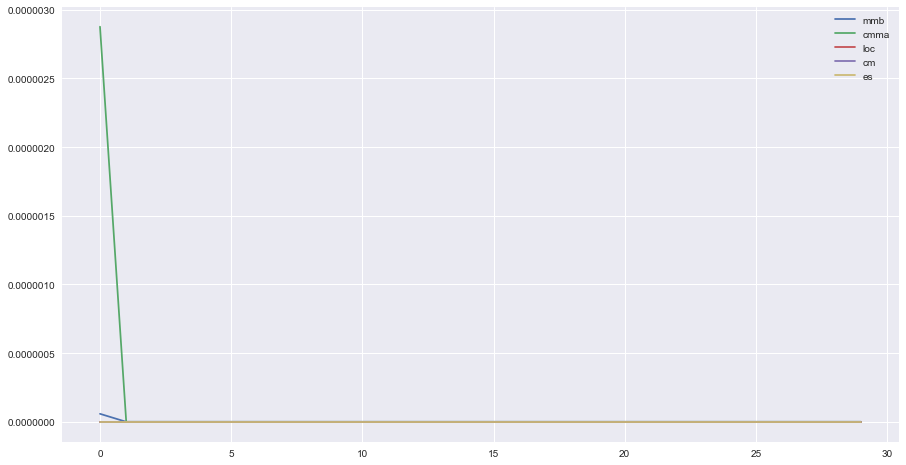

In [25]:
ESP_Markov_Model_Joint_Prob(ESP_Joint_Product_Probabilities,range_of_weeks=30,evidence_={'checking_usd':1,
                                                                                         'fx_products':1})

/Users/jonathanhilgart/anaconda/envs/SVB/lib/python3.6/site-packages/pgmpy/factors/Factor.py:377: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[0.11199172429029683, 0.026220732910149966, 0.0057267190369223401, 0.001266064510280736, 0.00029268797285279726, 7.1531346692792208e-05, 1.8547084146728838e-05, 5.1066706835542334e-06, 1.4928212446322435e-06, 4.6297352186996524e-07, 1.5212913519368601e-07, 5.2846393954272948e-08, 1.9329220467240696e-08, 7.3853465653073553e-09, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]


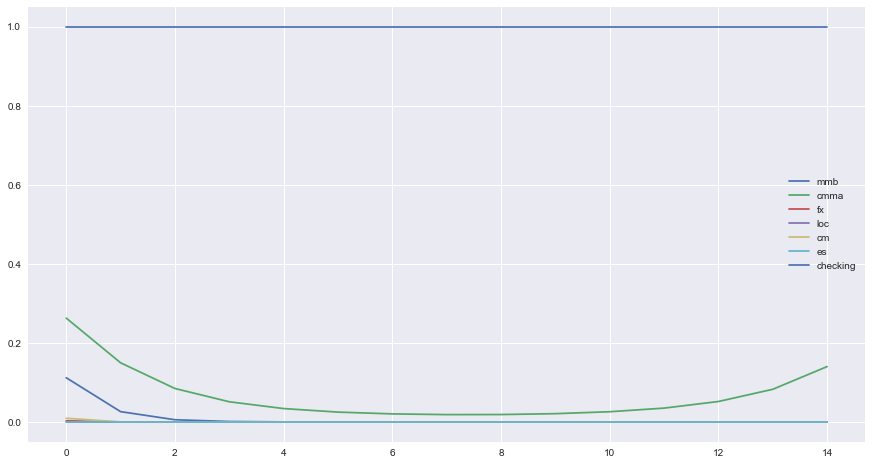

In [39]:
ESP_Markov_Model_Joint_Prob(ESP_Joint_Product_Probabilities,range_of_weeks=30)

In [249]:
model.get_local_independencies()

(collateral_mma _|_ fx_products, enterprise_sweep, checking_usd, letters_of_credit, cash_management | money_market_bonus)
(checking_usd _|_ fx_products, enterprise_sweep, collateral_mma, letters_of_credit, cash_management | money_market_bonus)
(cash_management _|_ fx_products, enterprise_sweep, checking_usd, collateral_mma, letters_of_credit | money_market_bonus)
(fx_products _|_ enterprise_sweep, checking_usd, collateral_mma, letters_of_credit, cash_management | money_market_bonus)
(letters_of_credit _|_ fx_products, enterprise_sweep, checking_usd, collateral_mma, cash_management | money_market_bonus)
(enterprise_sweep _|_ fx_products, checking_usd, collateral_mma, letters_of_credit, cash_management | money_market_bonus)

In [183]:
from IPython.display import Image
print(factor_mmb_checking)

╒══════════════════════╤════════════════╤════════════════════════════════════════╕
│ money_market_bonus   │ checking_usd   │   phi(money_market_bonus,checking_usd) │
╞══════════════════════╪════════════════╪════════════════════════════════════════╡
│ money_market_bonus_0 │ checking_usd_0 │                                 0.9912 │
├──────────────────────┼────────────────┼────────────────────────────────────────┤
│ money_market_bonus_0 │ checking_usd_1 │                                 0.5662 │
├──────────────────────┼────────────────┼────────────────────────────────────────┤
│ money_market_bonus_1 │ checking_usd_0 │                                 0.0000 │
├──────────────────────┼────────────────┼────────────────────────────────────────┤
│ money_market_bonus_1 │ checking_usd_1 │                                 0.0088 │
╘══════════════════════╧════════════════╧════════════════════════════════════════╛


In [220]:
belief_propagation = BeliefPropagation(model)

In [221]:
belief = belief_propagation.query(variables=['collateral_mma'])

In [237]:
belief['collateral_mma'].values

array([  1.00000000e+00,   1.35741448e-53])

In [59]:
dict_of_esp_money_market_cpd = dict_of_esp_money_market_joint_prob

In [60]:


factor_mmb_cmma = Factor(variables=['money_market_bonus', 'collateral_mma'],
                    cardinality=[2, 2],
                    values=[dict_of_esp_money_market_cpd['mmb0_cmma0'], dict_of_esp_money_market_cpd['mmb0_cmma1'],
                            dict_of_esp_money_market_cpd['mmb1_cmma0'], dict_of_esp_money_market_cpd['mmb1_cmma1']])
factor_mmb_cm = Factor(variables=['money_market_bonus', 'cash_management'],
                    cardinality=[2, 2],
                    values=[dict_of_esp_money_market_cpd['mmb0_cm0'], dict_of_esp_money_market_cpd['mmb0_cm1'],
                            dict_of_esp_money_market_cpd['mmb1_cm0'], dict_of_esp_money_market_cpd['mmb1_cm1']])
factor_mmb_fx = Factor(variables=['money_market_bonus', 'fx_products'],
                     cardinality=[2, 2],
                     values=[dict_of_esp_money_market_cpd['mmb0_fx0'], dict_of_esp_money_market_cpd['mmb0_fx1'],
                            dict_of_esp_money_market_cpd['mmb1_fx0'], dict_of_esp_money_market_cpd['mmb1_fx1']])
factor_mmb_loc = Factor(variables=['money_market_bonus', 'letters_of_credit'],
                     cardinality=[2, 2],
                     values=[dict_of_esp_money_market_cpd['mmb0_loc0'], dict_of_esp_money_market_cpd['mmb0_loc1'],
                            dict_of_esp_money_market_cpd['mmb1_loc0'], dict_of_esp_money_market_cpd['mmb1_loc1']])
factor_mmb_es = Factor(variables=['money_market_bonus', 'enterprise_sweep'],
                     cardinality=[2, 2],
                     values=[dict_of_esp_money_market_cpd['mmb0_es0'], dict_of_esp_money_market_cpd['mmb0_es1'],
                            dict_of_esp_money_market_cpd['mmb1_es0'], dict_of_esp_money_market_cpd['mmb1_es1']])  
factor_mmb_checking = Factor(variables=['money_market_bonus', 'checking_usd'],
                     cardinality=[2, 2],
                     values=[dict_of_esp_money_market_cpd['mmb0_checking0'], dict_of_esp_money_market_cpd['mmb0_checking1'],
                            dict_of_esp_money_market_cpd['mmb1_checking0'], dict_of_esp_money_market_cpd['mmb1_checking1']])   

# factor_cmma_checking = Factor(variables=['collateral_mma', 'checking_usd'],
#                     cardinality=[2, 2],
#                     values=[.1, .9, .5, .5])

# factor_cmma_cm = Factor(variables=['collateral_mma', 'checking_usd'],
#                     cardinality=[2, 2],
#                     values=[.4, .6, .3, .7])

# factor_cmma_fx = Factor(variables=['collateral_mma', 'fx_products'],
#                     cardinality=[2, 2],
#                     values=[.2, .8, .9, .1])

# factor_cmma_loc = Factor(variables=['collateral_mma', 'letters_of_credit'],
#                     cardinality=[2, 2],
#                     values=[.3, .7, .4, .6])

# factor_cmma_es = Factor(variables=['collateral_mma', 'letters_of_credit'],
#                     cardinality=[2, 2],
#                     values=[.1, .9, .4, .6])

model.add_factors(factor_mmb_cmma, factor_mmb_cm,
                   factor_mmb_fx, factor_mmb_loc,factor_mmb_es ,factor_mmb_checking)#,
belief_propagation = BeliefPropagation(model)
tes = belief_propagation.query(variables=['cash_management','enterprise_sweep','money_market_bonus'],
                              evidence={'checking_usd':0})

ValueError: Factor inconsistent with the model.

In [ ]:
cm0_checking0': 0.98050885200000004,
'cm0_checking1': 0.61828162900000005,
'cm0_es0': 0.99938906900000002
'cm1_checking0': 8.3459461199999996e-06,
 'cm1_checking1': 0.019491147600000001,

In [181]:
model = MarkovModel([( 'cm','check'), ('cm', 'C'),\
('C', 'D'), ('D', 'A')])
factor_a_b = Factor(variables=['cm', 'check'],
    cardinality=[2, 2], \
    values=[.98, .62, .0000083, .02])
# factor_b_c = Factor(variables=['B', 'C'],
#     cardinaity=[2, 2],
#     values=[100, 3, 2, 4])
factor_c_d = Factor(variables=['C', 'cm'],
    cardinality=[2, 2],
    values=[.3, .5, .1, .6])

model.add_factors(factor_a_b, 
factor_c_d)

In [182]:
belief = BeliefPropagation(model)

TypeError: reduce() of empty sequence with no initial value

In [147]:
test = belief.query(variables=['B','C'],
                              evidence={'A':0})

In [148]:
test['B'].values

array([ 0.95238095,  0.04761905])

In [101]:
print(test)

{'B': <Factor representing phi(B:2) at 0x111dedf98>, 'C': <Factor representing phi(C:2) at 0x111dedf60>}


In [100]:
print(factor_a_b)

╒═════╤═════╤════════════╕
│ A   │ B   │   phi(A,B) │
╞═════╪═════╪════════════╡
│ A_0 │ B_0 │   100.0000 │
├─────┼─────┼────────────┤
│ A_0 │ B_1 │     5.0000 │
├─────┼─────┼────────────┤
│ A_1 │ B_0 │     5.0000 │
├─────┼─────┼────────────┤
│ A_1 │ B_1 │   100.0000 │
╘═════╧═════╧════════════╛


In [74]:
belief_propagation = BeliefPropagation(model)
tes = belief_propagation.query(variables=['cash_management','enterprise_sweep','money_market_bonus'],
                              evidence={'checking_usd':0})

SyntaxError: invalid syntax (<ipython-input-74-30c3e5ed4930>, line 1)

In [ ]:
Discre